In [95]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [96]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [97]:
train_mov = train_data["movement"]
test_mov = test_data["movement"]
col_name = train_data.drop(["movement"],1).columns
train_data = pd.DataFrame(normalize(train_data.drop(["movement"],1)))
test_data = pd.DataFrame(normalize(test_data.drop(["movement"],1)))
train_data.columns = col_name
test_data.columns = col_name
train_data["movement"] = train_mov
test_data["movement"] = test_mov

In [98]:
train = train_data.drop(["Close (t)","movement"],1)
label_train = train_data["Close (t)"]
test = test_data.drop(["Close (t)","movement"],1)
label_test = test_data["Close (t)"]

In [118]:
def evaluate(test, label_test):
    predicted = test
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    cm = confusion_matrix(label_test, predicted)
    f = sns.heatmap(cm, annot=True, fmt='d')
    
    classification = classification_report(label_test, predicted)
    print(classification)

Decision Tree

In [100]:
dtr = DecisionTreeRegressor()
DecisionTreeRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

DecisionTreeRegressor(ccp_alpha=0, max_depth=6)

In [101]:
dtr.fit(train, label_train)

score = dtr.score(train, label_train)
print("R-squared:", score) 

ypred = dtr.predict(test)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 1.0
MSE:  2.152344444260399e-09
RMSE:  1.0761722221301995e-09


In [102]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = dtr.predict(train)
train_move = (ypred_train - train["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

accuracy: 0.48348745046235136
precision: 0.6407238245682941
recall: 0.48348745046235136
f1 0.4969369528164628
metrics.roc_auc_score 0.5512374257459448


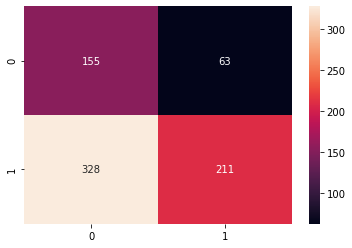

In [103]:
#metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)

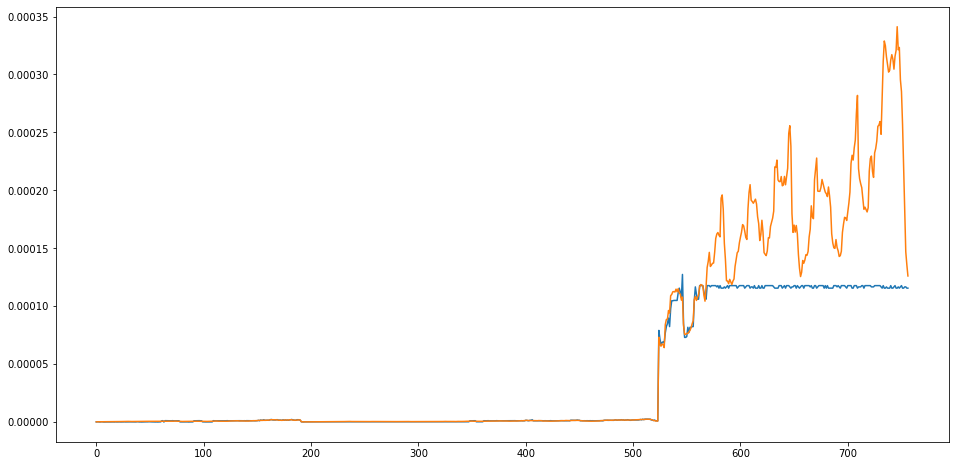

In [104]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

Gradient Boosting

In [105]:
gb = GradientBoostingRegressor()
GradientBoostingRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

GradientBoostingRegressor(ccp_alpha=0, criterion='mse', max_depth=6)

In [106]:
gb.fit(train, label_train)

score = gb.score(train, label_train)
print("R-squared:", score) 

ypred = gb.predict(test)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.9998887216181733
MSE:  2.171659245195034e-09
RMSE:  1.085829622597517e-09


In [107]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = gb.predict(train)
train_move = (ypred_train - train["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

accuracy: 0.5138705416116248
precision: 0.645852708001091
recall: 0.5138705416116248
f1 0.5323754269916768
metrics.roc_auc_score 0.5616457592211197


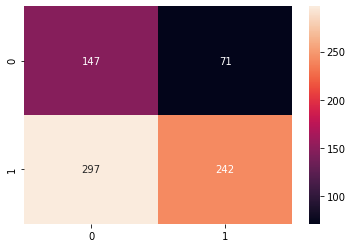

In [108]:
#metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)

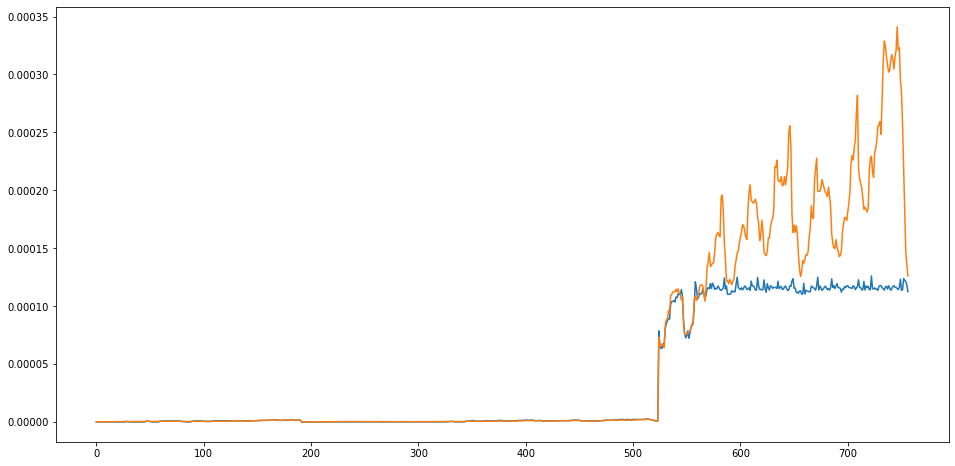

In [109]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

Random Forest

In [110]:
rfc = RandomForestRegressor()
RandomForestRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

RandomForestRegressor(ccp_alpha=0, max_depth=6)

In [111]:
rfc.fit(train, label_train)

score = rfc.score(train, label_train)
print("R-squared:", score) 

ypred = rfc.predict(test)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.9997480381976516
MSE:  2.1922276138731805e-09
RMSE:  1.0961138069365902e-09


In [112]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = rfc.predict(train)
train_move = (ypred_train - train["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

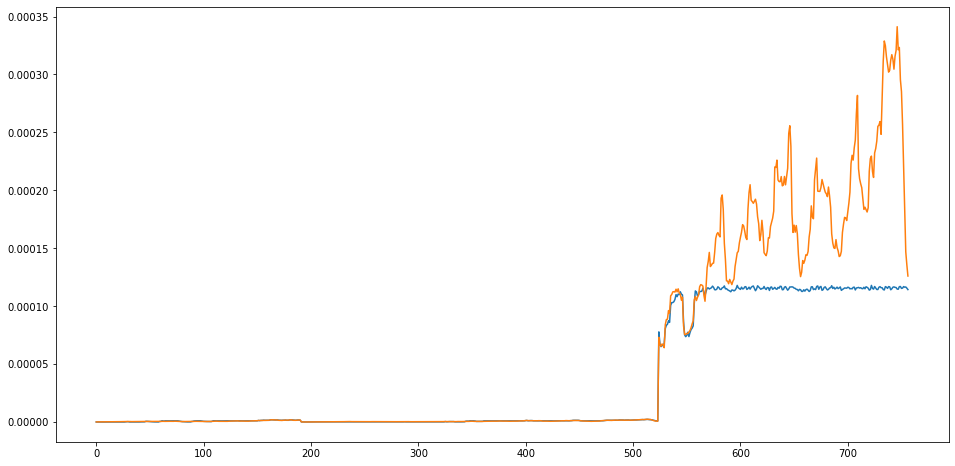

In [113]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

In [114]:
p = pd.concat([pd.DataFrame(ypred_train), train["Close (t-1)"], train_move], axis = 1)
p.columns = ["close (t)", "close(t-1)", "movement"]
#p

In [115]:
a = pd.concat([label_train, train["Close (t-1)"], train_data["movement"]], axis = 1)
a.columns = ["close (t)", "close(t-1)", "movement"]
#a

In [116]:
comb = p.merge(a, left_on = "close(t-1)", right_on = "close(t-1)")
len(comb[comb["movement_x"] == comb["movement_y"]])
len(a)

1768

accuracy: 0.5297225891677675
precision: 0.6633932817349786
recall: 0.5297225891677675
f1 0.5476240543723829
metrics.roc_auc_score 0.5809730898197478


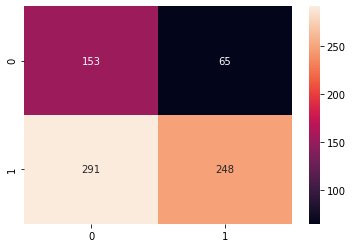

In [117]:
#metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)